# Trabajo 1 - Procesamiento Digital de Imágenes

Realizado por:
- Antonia Yepes
- Daniel Barrera


In [1]:
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread
import numpy as np
import pandas as pd
import os


## 1. Analisis de metadatos DICOM y visualización

In [4]:
# se lee el archivo dicom
file_path = 'Patient02/1/1.2.840.113564.1016726191.20221231195622993510.1203801020003.dcm'
dcm_data = pydicom.dcmread(file_path)

dcm_data


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113564.1016726191.20221231195622993510.1203801020003
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113564.1016726191.20221231195622993510.1203801020003
(0008, 0020) Study Date                          DA: '20221231'
(0008, 0

Al observar la metadata del archivo dicom, se puede observar que la modalidad es `'CR'`, lo que significa que se trata de una radiografía computarizada.

Ahora se procede a organizar la metadata extraída en Name, Tag, Type y Value. Para posteriormente explicar a qué hace referencia cada uno de ellos, el grupo al que pertenece, su relevancia y los valores válidos para ese metadato.

In [5]:
# se leen los keywords
'Scanner Model' in dcm_data.dir()

False

In [6]:
dcm_data.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionDeviceProcessingCode',
 'AcquisitionDeviceProcessingDescription',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmissionID',
 'AnatomicRegionSequence',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'BurnedInAnnotation',
 'CassetteOrientation',
 'CassetteSize',
 'CollimatorGridName',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DateOfLastCalibration',
 'DeviationIndex',
 'DeviceSerialNumber',
 'Exposure',
 'ExposureIndex',
 'ExposureTime',
 'ExposuresOnPlate',
 'GantryID',
 'HighBit',
 'ImageComments',
 'ImageType',
 'ImagerPixelSpacing',
 'InstanceNumber',
 'InstitutionAddress',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'KVP',
 'LossyImageCompression',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientPosition',
 'PatientSex',
 'PatientSize',
 'PatientWeight',
 'PerformedProcedureStepDescription',
 'PerformingPh

En la metadata de nuestra imagen no se encontraba el termino de `'Scanner Model'`. Este termino generalmente se refiere al modelo del equipo utilizado para adquirir la imagen. El keyword estándar para esto es `'ManufacturerModelName'`

Por otro lado se ha notado que los terminos `'Detector Active Shape'` (Se refiere a la forma geométrica del área activa del detector de imagen) y `'Detector Description'` (Se refiere a una descripción textual que proporciona detalles adicionales sobre el detector de imagen) no se encontraban en la metadata de la imagen. La ausencia estos términos en los data elements del archivo DICOM analizado se debe a que la inclusión de determinados atributos en la metadata depende tanto del fabricante del equipo como de la modalidad y configuración utilizada durante la adquisición de la imagen. No todos los campos definidos por el estándar DICOM son obligatorios para todos los estudios, por lo que es común que algunos atributos específicos no estén presentes si el equipo no los registra o si no son requeridos para ese tipo de procedimiento [1]. Por esta razón, dichos términos no aparecen entre los keywords disponibles en la metadata del archivo evaluado.

In [7]:
# se definen los datos de acuerdo a la modalidad
data_elements = [
    'PatientName',
    'Modality',
    'ViewPosition',
    'BodyPartExamined',
    'RelativeXRayExposure',
    'PhotometricInterpretation',
    'Manufacturer',
    'ManufacturerModelName'
]

for i in data_elements:
    print(dcm_data.data_element(i))

(0010, 0010) Patient's Name                      PN: 'anonymize'
(0008, 0060) Modality                            CS: 'CR'
(0018, 5101) View Position                       CS: 'AP'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 1405) Relative X-Ray Exposure             IS: '1194'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0008, 0070) Manufacturer                        LO: 'Carestream Health'
(0008, 1090) Manufacturer's Model Name           LO: ''


In [19]:
# se muestra la metadata en forma de tabla
metadata = []

for i in data_elements:
    element = dcm_data.data_element(i)
    
    if element is None:
        name = i
        tag = ''
        elem_type = ''
        value = 'No disponible'
    else:
        name = element.keyword
        tag = element.tag
        elem_type = element.VR
        value = element.value
    
    metadata.append({
        'Name': name,
        'Tag': tag,
        'Type': elem_type,
        'Value': value
    })
    
# dataframe
metadata_df = pd.DataFrame(metadata, columns=['Name', 'Tag', 'Type', 'Value'])
metadata_df




,Name,Tag,Type,Value
0,PatientName,1048592,PN,"(a, n, o, n, y, m, i, z, e)"
1,Modality,524384,CS,CR
2,ViewPosition,1593601,CS,AP
3,BodyPartExamined,1572885,CS,CHEST
4,RelativeXRayExposure,1577989,IS,1194
5,PhotometricInterpretation,2621444,CS,MONOCHROME2
6,Manufacturer,524400,LO,Carestream Health
7,ManufacturerModelName,528528,LO,


In [18]:
metadata = []

for i in data_elements:
    element = dcm_data.data_element(i)
    
    if element is None:
        name = i
        tag = ''
        elem_type = ''
        value = 'No disponible'
    else:
        name = element.keyword
        tag = f"({element.tag.group:04X}, {element.tag.element:04X})"
        elem_type = element.VR
        value = element.value
    
    metadata.append({
        'Name': name,
        'Tag': tag,
        'Type': elem_type,
        'Value': value
    })

metadata_df = pd.DataFrame(metadata, columns=['Name', 'Tag', 'Type', 'Value'])
metadata_df

,Name,Tag,Type,Value
0,PatientName,"(0010, 0010)",PN,"(a, n, o, n, y, m, i, z, e)"
1,Modality,"(0008, 0060)",CS,CR
2,ViewPosition,"(0018, 5101)",CS,AP
3,BodyPartExamined,"(0018, 0015)",CS,CHEST
4,RelativeXRayExposure,"(0018, 1405)",IS,1194
5,PhotometricInterpretation,"(0028, 0004)",CS,MONOCHROME2
6,Manufacturer,"(0008, 0070)",LO,Carestream Health
7,ManufacturerModelName,"(0008, 1090)",LO,


### Visualización de la imagen

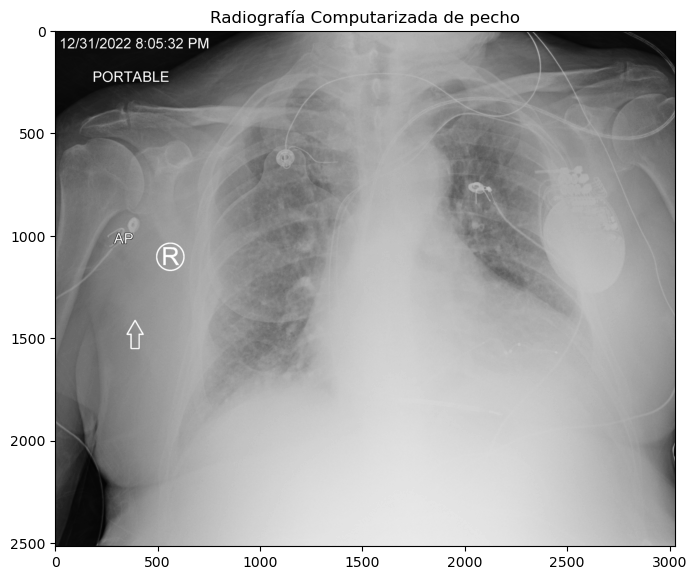

In [25]:
img = dcm_data.pixel_array

plt.figure(figsize=(8, 8))

plt.imshow(img, cmap='gray')
plt.title('Radiografía Computarizada de pecho')
plt.show()

## 2. Comparación multimodal de imágenes

Para esta sección del trabajo se tienen tres estudios de una misma persona (una RM, una TC y una RX) del mismo segmento corporal. Dos de los estudios cuentan con un directorio que contiene multiples archivos DICOM, por lo cual se puede inferir que se trata los diferentes cortes (slices) de la imagen. Esto da a entender que esos dos directorios corresponden tanto al estudio de Resonancia Magnética, como al de Tomografía Computarizada. Esto se puede asumir porque tanto la Resonancia Magnética (MR) como la Tomografía Computarizada (TC) generan estudios volumétricos compuestos por múltiples cortes (slices), cada uno almacenado como un archivo DICOM independiente [2], a diferencia de la radiografía (RX) que usualmente es una sola imagen. Para verificar que esto es asi, a continuación se lee la información contenida en los archivos DICOM para cada modalidad, especificamente al leer el data_element correspondiente a `'Modality'`.

In [ ]:
# se obtiene el archivo dicom de cada modalidad
ds1 = pydicom.dcmread('P2_modalidades/Modalidad1/201/1.3.46.670589.11.45555.5.0.8860.2024062407350848047.dcm')
ds2 = pydicom.dcmread('P2_modalidades/Modalidad2/ScalarVolume_13/IMG0001.dcm')
ds3 = pydicom.dcmread('P2_modalidades/Modalidad3/ScalarVolume_27/IMG0001.dcm')

# se lee la modalidad
print(f'Modalidad del primer directorio: {ds1.Modality}')
print(f'Modalidad del segundo directorio: {ds2.Modality}')
print(f'Modalidad del tercer directorio: {ds3.Modality}')


Modalidad del primer directorio: MR
Modalidad del segundo directorio: CR
Modalidad del tercer directorio: CT


Como se puede observar, la informacion contenida de los estudios de MR y CT si corresponden a los directorios donde se tenian multiples archivos DICOM.

A continuacion se procede a realizar una comparacion de la informacion

In [2]:
# directorio de la imagen 1
img1_path = os.listdir('P2_modalidades/Modalidad1/201')

# directorio de la imagen 2 (solo un archivo dicom)
img2_path = 'P2_modalidades/Modalidad2/ScalarVolume_13/IMG0001.dcm'

# directorio de la imagen 3
img3_path = os.listdir('P2_modalidades/Modalidad3/ScalarVolume_27')

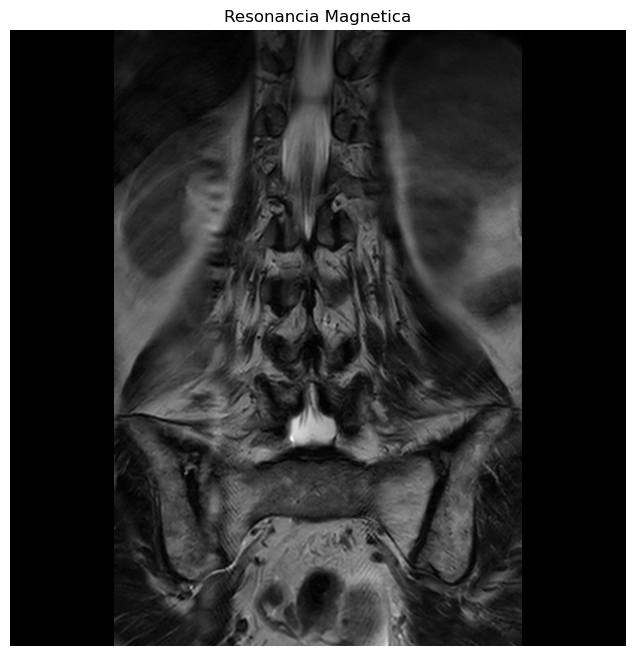

In [58]:
from operator import attrgetter
# Carpeta con los archivos DICOM
folder_1 = 'P2_modalidades/Modalidad1/201'
img1_names = os.listdir('P2_modalidades/Modalidad1/201')
paths = [os.path.join(folder_1, f) for f in img1_names] # directorios de los archivos dicom

dicoms = [pydicom.dcmread(p) for p in paths] # se leen los archivos dicom
dicoms.sort(key=attrgetter('InstanceNumber'))

# corte central de la serie
img1 = dicoms[(len(dicoms)//2)].pixel_array

# visualizacion
plt.figure(figsize=(8,8))
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title('Resonancia Magnetica')
plt.show()

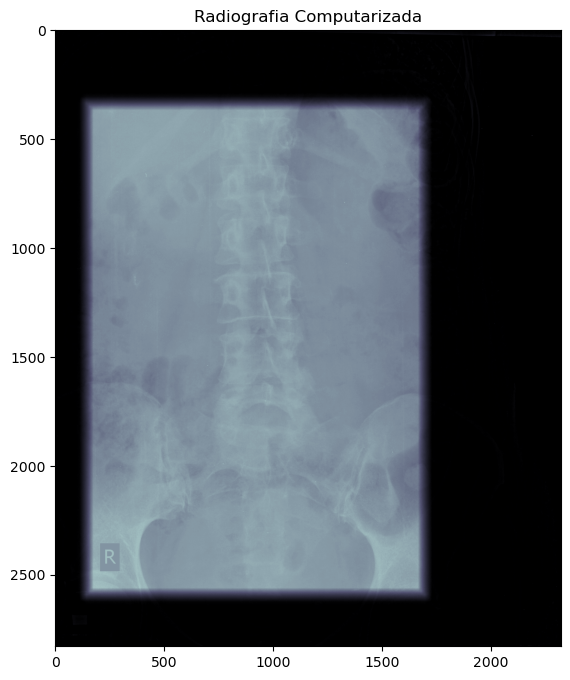

In [ ]:
data_dicom2 = pydicom.dcmread(img2_path)
img2 = data_dicom2.pixel_array # imagen

# data_dicom2

# visualizacion
plt.figure(figsize=(8,8))
plt.imshow(img2, cmap=plt.cm.bone)
plt.axis('off')
plt.title('Radiografia Computarizada')
plt.show()



### Referencias

[1] Bidgood Jr, W. D., Horii, S. C., Prior, F. W., & Van Syckle, D. E. (1997). Understanding and using DICOM, the data interchange standard for biomedical imaging. Journal of the American Medical Informatics Association, 4(3), 199-212.

[2] Ramos Núñez, Oswaldo & villareal, manuel & angel, nairubia. (2014). SISTEMA DE ARCHIVO Y COMUNICACIÓN DE IMÁGENES EN UNA UNIDAD DE IMAGENOLOGIA (File system and communication of images in a Imaging Unit). Revista Electrónica Facultad de Ingeniería UVM. Volumen 8. 1109. 